In [1]:
import Tarea_3_alt
import numpy as np
from scipy.spatial import distance
from functools import partial

In [2]:
montecarlo2D_new_UP = Tarea_3_alt.montecarlo2D(0.4,81)

In [3]:
print("El radio de las particulas es:",montecarlo2D_new_UP.r())
print("La longitud de la caja es:",montecarlo2D_new_UP.L())

El radio de las particulas es: 0.31622776601683794
La longitud de la caja es: 14.230249470757707


In [4]:
def DGM(self,r):
    nu = 5
    sigma =2*self.r()
    epsilon = 10
    V=0
    if r < self.L()/2:
        V = 4.0 * epsilon * ((sigma/r)**12 - (sigma/r)**6 )
    return V


In [5]:
montecarlo2D_new_UP.mod_pot = partial(DGM, montecarlo2D_new_UP)


In [6]:
NSTEP= 200

In [7]:
configuracion = montecarlo2D_new_UP.algoritmo(montecarlo2D_new_UP.N*NSTEP,0.2)

Se han traslapdo  169  veces en la configuracion 50 -801.0868675928533
Se han traslapdo  236  veces en la configuracion 100 -1008.4866189303644
Se han traslapdo  305  veces en la configuracion 150 -1111.0052700062167
Se han traslapdo  327  veces en la configuracion 200 -1154.703824402646
Se ha tardado 178.28563 segundos


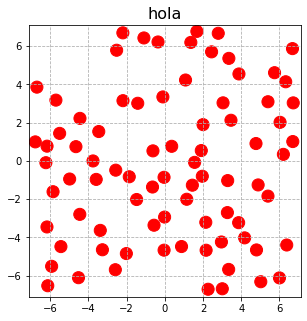

In [8]:
montecarlo2D_new_UP.graph_show(montecarlo2D_new_UP.data,"hola")

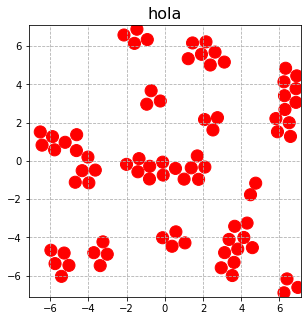

In [9]:
montecarlo2D_new_UP.graph_show(configuracion,"hola")


In [10]:
montecarlo2D_new_UP.sumaup(montecarlo2D_new_UP.data)

-227.00658283683143

In [11]:
montecarlo2D_new_UP.sumaup(configuracion)

-1151.9655624488407

In [12]:
configuraciones=list()
for i in range(NSTEP):
    configuraciones.append(np.genfromtxt("Configs/configuración"+str(i)+".csv",delimiter=',',dtype=float))

In [13]:
Up=[]
for i in range(0,len(configuraciones)):
    Up.append(montecarlo2D_new_UP.sumaup(configuraciones[i]))


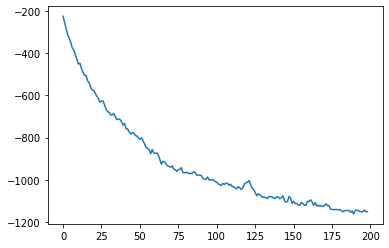

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Up[0:-1])

In [102]:
uniform = Tarea_3_alt.arreglo2D_cuadrado(0.4,25).array()


In [114]:
deltas = configuracion[:, np.newaxis] - configuracion



(81, 81, 2)

[  0.   0. 236.  12. 138.  26.  82.  70.  72. 112. 126. 174. 168. 182.
 170. 158. 152. 168. 170. 214. 214. 248. 248. 244. 198. 194. 188. 180.
 198. 176. 184. 164. 172. 114. 132. 104. 132. 110. 108. 120.  88. 110.
  62.  84.  58.  50.  42.  24.  24.  10.]
[ 0.   0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3.   3.3  3.6  3.9
  4.2  4.5  4.8  5.1  5.4  5.7  6.   6.3  6.6  6.9  7.2  7.5  7.8  8.1
  8.4  8.7  9.   9.3  9.6  9.9 10.2 10.5 10.8 11.1 11.4 11.7 12.  12.3
 12.6 12.9 13.2 13.5 13.8 14.1 14.4 14.7]


(array([ 80.,   0., 236.,  12., 138.,  26.,  82.,  70.,  72., 112., 126.,
        174., 168., 182., 170., 158., 152., 168., 170., 214., 214., 248.,
        248., 244., 198., 194., 188., 180., 198., 176., 184., 164., 172.,
        114., 132., 104., 132., 110., 108., 120.,  88., 110.,  62.,  84.,
         58.,  50.,  42.,  24.,  24.,  10.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
         3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
         6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
         9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. , 12.3, 12.6, 12.9,
        13.2, 13.5, 13.8, 14.1, 14.4, 14.7, 15. ]),
 <BarContainer object of 50 artists>)

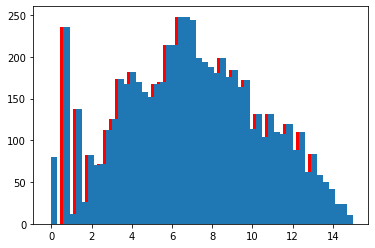

In [340]:
deltas = configuracion[:, np.newaxis] - configuracion
dists = np.linalg.norm(deltas, axis=-1)
Hist_config=[]

x_a,y_a = list(),list()
y_sum = np.zeros((50,))
for i in range(montecarlo2D_new_UP.N):
    y,x = np.histogram(dists[i],range=(0,15),bins=50,density =False)
    y[0]=0
    x = np.array(x[:-1])
    x_a.append(x)
    y_a.append(y)
    x_c = np.array(x_a)
    y_c = np.array(y_a)
    c = np.array([x,y]).T
    Hist_config.append(c)
    #del(c)
    y_sum = y_sum + y_c[i]
    
#Hist_config[0]
#x.shape
print(y_sum)
print(x_c[0])
plt.bar(x_c[0],y_sum,color="r",width=0.3)
#Hist_config[0][
dists[i,i]= np.nan
dists = dists[~np.isnan(dists)]

plt.hist(dists.ravel(),range=(0,15),bins=50)



##### def hist(data,bins):
    deltas = data[:, np.newaxis] - data
    dists = np.linalg.norm(deltas, axis=-1)
    i = np.arange(montecarlo2D_new_UP.N)
    dists[i,i]= np.nan
    dists = dists[~np.isnan(dists)]
    mean = dists.ravel()
    h,w=np.histogram(mean,bins=bins,range=(0,mean.max()),density =False)
    w = w[:-1]
    return h,w



In [104]:
h_f,w_f = hist(configuraciones[-1],150)
#h_i,w_i = hist(np.array(uniform),50)
w_f = w_f / (2*montecarlo2D_new_UP.r())


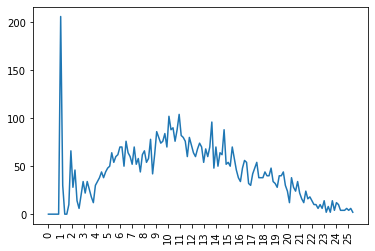

In [105]:
#plt.plot(w_i,h_i)
plt.plot(w_f,h_f)
plt.xticks(np.arange(0,np.max(w_f),1),rotation=90)
plt.show()

In [106]:
dr = w_f[2] 
dr
h_f

array([  0,   0,   0,   0,   0,   0, 206,  30,   0,   0,  10,  66,  28,
        46,  14,   6,  20,  34,  22,  34,  26,  18,  12,  30,  34,  38,
        44,  38,  44,  48,  50,  64,  54,  60,  62,  70,  70,  50,  76,
        64,  60,  52,  70,  52,  58,  44,  62,  66,  54,  58,  78,  42,
        62,  86,  80,  74,  76,  84,  70, 102,  88,  90,  76,  88, 104,
        82,  80,  76,  60,  80,  72,  64,  60,  68,  74,  70,  54,  68,
        60,  70,  96,  48,  70,  50,  64,  62,  88,  52,  54,  50,  70,
        58,  46,  38,  34,  48,  56,  54,  32,  30,  42,  48,  54,  38,
        38,  38,  44,  40,  40,  48,  34,  32,  28,  40,  40,  44,  30,
        24,  12,  38,  28,  24,  34,  22,  16,  12,  24,  16,  18,  14,
        10,  10,   6,  10,   6,  14,   2,   8,   2,  14,   4,  12,  10,
         4,   4,   4,   6,   4,   6,   2])

In [111]:
h_f_2 = np.divide(h_f[1:],dr**2) 

#h_f[1:]=h_f_2/(4*np.pi*montecarlo2D_new_UP.n*dr)
h_f[1:]=h_f_2
histogram = np.array([w_f,h_f]).T
#histogram

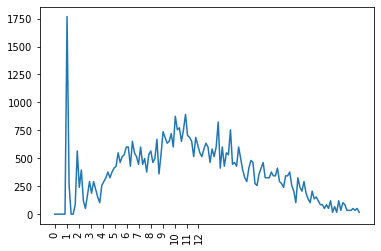

In [109]:
plt.plot(w_f,h_f)
plt.xticks(np.arange(0,np.max(w_f)/2,1),rotation=90)

plt.show()

In [110]:
import seaborn as sns
sns.displot(x=w,weights=h, fill=True,bins=100)


NameError: name 'w' is not defined

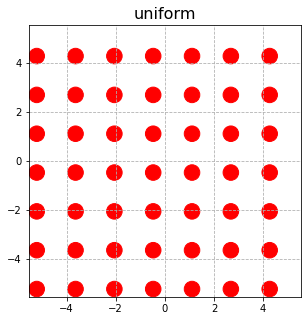

(array([90., 16., 18., 48., 50., 48., 26., 46., 40., 54., 32., 18., 20.,
        46., 18., 12.,  2., 12.,  0.,  4.]),
 array([ 1.832677  ,  2.2986748 ,  2.76467261,  3.23067042,  3.69666822,
         4.16266603,  4.62866384,  5.09466164,  5.56065945,  6.02665726,
         6.49265506,  6.95865287,  7.42465068,  7.89064848,  8.35664629,
         8.8226441 ,  9.28864191,  9.75463971, 10.22063752, 10.68663533,
        11.15263313]),
 <BarContainer object of 20 artists>)

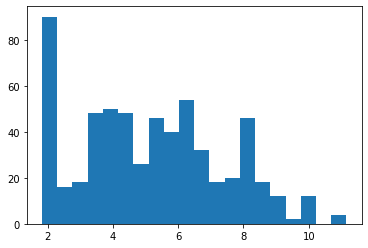

In [199]:
plt.hist(dists.ravel(),bins = int(20))

In [120]:
color_pre=c
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-mama.L()/2,mama.L()/2)
plt.ylim(-mama.L()/2,mama.L()/2)
plt.grid(linestyle='--')
ax.set_aspect(1)
for i in range(0,configuracion[1]):
    if i in trazadora:
        c="r"
    else:    
        c=color_pre
    circle1 = plt.Circle(configuracion[1], mama.r(), color=c)
    ax.add_artist(circle1)
    #ax.annotate(str(i), xy=data[i], fontsize=8)

plt.title(title, fontsize=16)
plt.show()

NameError: name 'c' is not defined

In [2]:
import numpy as np
5< np.inf

True